In [0]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math
import csv

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = "/content/drive/My Drive/Datasets/EPL.csv"
path2 = "/content/drive/My Drive/Datasets/EPL 2017.csv"
data = pd.read_csv(path)
data2 = pd.read_csv(path2)

In [4]:
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,11,8,2,5,2,1,0,0,1.57,3.9,7.50,1.53,4.0,7.50,1.55,3.80,7.00,1.58,3.93,7.50,1.57,3.8,6.00,1.57,4.0,7.00,39,1.60,1.56,4.20,3.92,8.05,7.06,38,2.12,2.03,1.85,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,11,9,7,4,1,1,0,0,1.90,3.6,4.50,1.90,3.4,4.40,1.90,3.50,4.10,1.89,3.63,4.58,1.91,3.5,4.00,1.87,3.6,4.75,39,1.93,1.88,3.71,3.53,4.75,4.37,38,2.05,1.98,1.92,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,9,11,5,5,1,2,0,0,2.50,3.4,3.00,2.45,3.3,2.95,2.40,3.30,2.95,2.50,3.46,3.00,2.45,3.3,2.80,2.50,3.4,3.00,39,2.60,2.47,3.49,3.35,3.05,2.92,38,2.00,1.95,1.96,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,9,8,2,5,2,1,0,0,6.50,4.0,1.61,6.25,3.9,1.57,6.20,4.00,1.55,6.41,4.02,1.62,5.80,3.9,1.57,6.50,4.0,1.62,38,6.85,6.09,4.07,3.90,1.66,1.61,37,2.05,1.98,1.90,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,11,12,3,5,2,2,0,0,3.90,3.5,2.04,3.80,3.5,2.00,3.70,3.35,2.05,3.83,3.57,2.08,3.80,3.2,2.05,3.90,3.4,2.10,39,4.01,3.83,3.57,3.40,2.12,2.05,38,2.10,2.01,1.88,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


In [0]:
teamList = ['Arsenal', 'Aston Villa' , 'Bournemouth', 'Brighton' , 'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Leicester', 'Liverpool', 'Man City', 'Man United', 'Norwich' , 'Newcastle' ,'Southampton', 'Sheffield Utd', 'Tottenham', 'Wolves' , 'Watford', 'West Ham']
team_names = pd.DataFrame(teamList,columns=['Team_name'])


### Making winner and loser column

In [0]:
def win(row):
    if (row["FTR"] == "A"):
        return row["AwayTeam"]
    elif (row["FTR"] == "H"):
        return row["HomeTeam"]
    elif (row["FTR"] == "D"):
        return "None"
    

def lose(row):
    if (row["FTR"] == "A"):
        return row["HomeTeam"]
    elif (row["FTR"]  == "H"):
        return row["AwayTeam"]
    elif (row["FTR"]  == "D"):
        return "None"

data["Winner"] = data.apply(win, axis=1) 
data["Loser"] = data.apply(lose, axis=1)

data2["Winner"] = data2.apply(win, axis=1) 
data2["Loser"] = data2.apply(lose, axis=1)



### Feature Setup

In [0]:
def TeamData(teamName):
    annual_data = data
    #num goals scored in wins and losses 
    gamesHome = annual_data[annual_data["HomeTeam"] == teamName]
    totalGoalsScored = gamesHome["FTHG"].sum()
    gamesAway = annual_data[annual_data["AwayTeam"] == teamName]
    totalGames = gamesHome.append(gamesAway)
    numGames = len(totalGames.index)
    #total goals scored
    totalGoalsScored += gamesAway["FTAG"].sum()
    #total goals allowed
    totalGoalsAllowed = gamesHome["FTAG"].sum()
    totalGoalsAllowed += gamesAway["FTHG"].sum()
    #discipline: total red cards, total yellow cards
    totalYellowCards = gamesHome["HY"].sum()
    totalYellowCards += gamesAway["AY"].sum()
    totalRedCards = gamesHome["HR"].sum()
    totalRedCards += gamesHome["AY"].sum() 
    #total fouls 
    totalFouls = gamesHome["HF"].sum()
    totalFouls += gamesAway["AF"].sum()
    #total corners
    totalCorners = gamesHome["HC"].sum()
    totalCorners += gamesAway["AC"].sum()
    #shots per game (spg) = total shots / total games
    totalShots = gamesHome["HS"].sum()
    #avgshots per game
    totalShots += gamesAway["AS"].sum()
    if numGames != 0:
        spg = totalShots / numGames
    # avg shots allowed per game
    totalShotsAgainst = gamesHome["AS"].sum()
    totalShotsAgainst += gamesAway["HS"].sum()
    if numGames != 0:
        sag = totalShotsAgainst / numGames
    #Games Won percentage = Games Won / (Games won + Games Lost)
    gamesWon = annual_data[annual_data["Winner"] == teamName]
    gamesLost = annual_data[annual_data["Loser"] == teamName]
    numGamesWon = len(gamesWon.index)
    numGamesLost = len(gamesLost.index)
    if numGames != 0:
        gamesWonPercentage = numGamesWon / numGames
     #Defense stats
        #Goalie Saves = Shots on Goal - Goal Scored
    #totalShotsonGoal = tsog
    tsog  = gamesHome["HST"].sum()
    tsog += gamesAway["AST"].sum()
    goalieSaves = tsog - totalGoalsAllowed
       #Saves Percentage = Goalie Saves / Shots on Goal
    if tsog != 0:
        savesPercentage = goalieSaves / tsog
        #Saves Ratio = shots on Goal / Goalie Saves
    if goalieSaves != 0:
        savesRatio = tsog / goalieSaves
    
    #offense stats
        #Scoring Percentage = (Scoring Attempts - Goals Scored) / Scorring Attempts
    if totalShots != 0 :
        scoringPercentage = (totalShots - totalGoalsScored) / totalShots
        #Scoring Ratio = Shots on Goal / Goalie Saves
    if tsog != 0:
        scoringRatio = tsog / totalGoalsScored
        
    if numGames == 0: #if team not in dataset
        gamesWon = 0 
        gamesLost = 0
        totalGoalsScored = 0
        totalGoalsAllowed = 0
        totalYellowCards = 0
        totalRedCards = 0
        totalFouls = 0
        totalCorners = 0
        spg = 0
        sag = 0
        gamesWonPercentage = 0
        goalieSaves = 0 
        savesPercentage = 0
        savesRatio= 0
        scoringPercentage = 0 
        scoringRatio = 0 

    return[totalYellowCards, totalRedCards, scoringPercentage, totalCorners, spg, gamesWonPercentage]

In [16]:
TeamData("Chelsea")

[49, 29, 0.8960396039603961, 215, 15.947368421052632, 0.5526315789473685]

### Model Training

In [0]:
totalNumGames = 0 
totalNumGames += len(data.index)
numFeatures = len(TeamData("Arsenal"))# to find dimensionality
xTrain1 = np.zeros((totalNumGames, numFeatures))
yTrain1 = np.zeros((totalNumGames))

In [0]:
from collections import defaultdict
annualDictionary = defaultdict(list)
for team in teamList:
    team_vector = TeamData(team)
    annualDictionary[team] = team_vector

### Loading according to dimensionality

In [0]:
team_vectors = annualDictionary
annual = data
numGamesInYear = len(annual.index)
xTrainAnnual = np.zeros((numGamesInYear, numFeatures))
yTrainAnnual = np.zeros((numGamesInYear))
counter = 0

### Formulating the X_train and Y_train

In [0]:
for index, row in annual.iterrows():
    h_team = row["HomeTeam"]
    h_vector = team_vectors[h_team]
    a_team = row["AwayTeam"]
    a_vector = team_vectors[a_team]
    diff = [a-b for a, b in zip(h_vector, a_vector)]
    if (counter % 2 == 0):
        if len(diff) != 0:
            xTrainAnnual[counter] = diff
        yTrainAnnual[counter] = 1
    else: 
        if len(diff)!=0:
            xTrainAnnual[counter] = [-p for p in diff]
        yTrainAnnual[counter] = 0
    counter += 1

In [0]:
indexCounter = 0 
xTrain1[indexCounter:numGamesInYear+indexCounter] = xTrainAnnual
yTrain1[indexCounter:numGamesInYear+indexCounter] = yTrainAnnual
indexCounter += numGamesInYear

### 2017-18 dataset is included for better accuracy

#### 2017-18 feature selection

In [0]:
def TeamData2(teamName):
    annual_data = data2
    #num goals scored in wins and losses 
    gamesHome = annual_data[annual_data["HomeTeam"] == teamName]
    totalGoalsScored = gamesHome["FTHG"].sum()
    gamesAway = annual_data[annual_data["AwayTeam"] == teamName]
    totalGames = gamesHome.append(gamesAway)
    numGames = len(totalGames.index)
    #total goals scored
    totalGoalsScored += gamesAway["FTAG"].sum()
    #total goals allowed
    totalGoalsAllowed = gamesHome["FTAG"].sum()
    totalGoalsAllowed += gamesAway["FTHG"].sum()
    #discipline: total red cards, total yellow cards
    totalYellowCards = gamesHome["HY"].sum()
    totalYellowCards -= gamesAway["AY"].sum()
    totalRedCards = gamesHome["HR"].sum()
    totalRedCards -= gamesHome["AY"].sum() 
    #total fouls 
    totalFouls = gamesHome["HF"].sum()
    totalFouls += gamesAway["AF"].sum()
    #total corners
    totalCorners = gamesHome["HC"].sum()
    totalCorners += gamesAway["AC"].sum()
    #shots per game (spg) = total shots / total games
    totalShots = gamesHome["HS"].sum()
    #avgshots per game
    totalShots += gamesAway["AS"].sum()
    if numGames != 0:
        spg = totalShots / numGames
    # avg shots allowed per game
    totalShotsAgainst = gamesHome["AS"].sum()
    totalShotsAgainst += gamesAway["HS"].sum()
    if numGames != 0:
        sag = totalShotsAgainst / numGames
    #Games Won percentage = Games Won / (Games won + Games Lost)
    gamesWon = annual_data[annual_data["Winner"] == teamName]
    gamesLost = annual_data[annual_data["Loser"] == teamName]
    numGamesWon = len(gamesWon.index)
    numGamesLost = len(gamesLost.index)
    if numGames != 0:
        gamesWonPercentage = numGamesWon / numGames
     #Defense stats
        #Goalie Saves = Shots on Goal - Goal Scored
    #totalShotsonGoal = tsog
    tsog  = gamesHome["HST"].sum()
    tsog += gamesAway["AST"].sum()
    goalieSaves = tsog - totalGoalsAllowed
       #Saves Percentage = Goalie Saves / Shots on Goal
    if tsog != 0:
        savesPercentage = goalieSaves / tsog
        #Saves Ratio = shots on Goal / Goalie Saves
    if goalieSaves != 0:
        savesRatio = tsog / goalieSaves
    
    #offense stats
        #Scoring Percentage = (Scoring Attempts - Goals Scored) / Scorring Attempts
    if totalShots != 0 :
        scoringPercentage = (totalShots - totalGoalsScored) / totalShots
        #Scoring Ratio = Shots on Goal / Goalie Saves
    if tsog != 0:
        scoringRatio = tsog / totalGoalsScored
        
    if numGames == 0: #if team not in dataset
        gamesWon = 0 
        gamesLost = 0
        totalGoalsScored
        totalGoalsAllowed = 0
        totalYellowCards = 0
        totalRedCards = 0
        totalFouls = 0
        totalCorners = 0
        spg = 0
        sag = 0
        gamesWonPercentage = 0
        goalieSaves = 0 
        savesPercentage = 0
        savesRatio= 0
        scoringPercentage = 0 
        scoringRatio = 0

    return[totalYellowCards, totalRedCards, scoringPercentage, totalCorners, spg, gamesWonPercentage]

In [0]:
totalNumGames = 0 
totalNumGames += len(data2.index)
numFeatures = len(TeamData2("Arsenal"))# to find dimensionality
xTrain2 = np.zeros((totalNumGames, numFeatures))
yTrain2 = np.zeros((totalNumGames))

from collections import defaultdict
annualDictionary = defaultdict(list)
for team in teamList:
    team_vector = TeamData2(team)
    annualDictionary[team] = team_vector

team_vectors = annualDictionary
annual = data2
numGamesInYear = len(annual.index)
xTrainAnnual = np.zeros((numGamesInYear, numFeatures))
yTrainAnnual = np.zeros((numGamesInYear))
counter = 0 

for index, row in annual.iterrows():
    h_team = row["HomeTeam"]
    h_vector = team_vectors[h_team]
    a_team = row["AwayTeam"]
    a_vector = team_vectors[a_team]
    diff = [a-b for a, b in zip(h_vector, a_vector)]
    if (counter % 2 == 0):
        if len(diff) != 0:
            xTrainAnnual[counter] = diff
        yTrainAnnual[counter] = 1
    else: 
        if len(diff)!=0:
            xTrainAnnual[counter] = [-p for p in diff]
        yTrainAnnual[counter] = 0
    counter += 1

indexCounter = 0 
xTrain2[indexCounter:numGamesInYear+indexCounter] = xTrainAnnual
yTrain2[indexCounter:numGamesInYear+indexCounter] = yTrainAnnual
indexCounter += numGamesInYear


In [0]:
# combining the training sets of both seasons
xtrainfin = np.concatenate([xTrain2,xTrain1], axis=0)
ytrainfin = np.concatenate([yTrain2,yTrain1], axis=0)



In [28]:
ytrainfin.shape

(760,)

In [0]:
xTrain, X_test, yTrain, y_test = train_test_split(xtrainfin, ytrainfin)

In [0]:
xTraindf = pd.DataFrame(xTrain, columns=['totalYellowCards', 'totalRedCards', 'scoringPercentage', 'totalCorners', 'spg', 'gamesWonPercentage'])
bylr = xTraindf.copy()
bylr['yTrain'] = yTrain

In [32]:
import pymc3 as pm
with pm.Model() as reg:
    pm.glm.GLM.from_formula('yTrain ~ totalYellowCards + totalRedCards + scoringPercentage + totalCorners + spg + gamesWonPercentage', bylr)
    trace = pm.sample(1000, cores=2, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, gamesWonPercentage, spg, totalCorners, scoringPercentage, totalRedCards, totalYellowCards, Intercept]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:15<00:00, 255.40draws/s]


In [37]:
ppc = pm.sample_ppc(trace, model=reg, samples=1000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  """Entry point for launching an IPython kernel.
100%|██████████| 1000/1000 [00:01<00:00, 584.31it/s]


In [38]:
model_formula = 'Featuressum = '
for variable in trace.varnames:
    model_formula += ' %0.2f * %s +' % (np.mean(trace[variable]), variable)

' '.join(model_formula.split(' ')[:-1])

'Featuressum =  0.52 * Intercept + 0.00 * totalYellowCards + -0.00 * totalRedCards + 0.12 * scoringPercentage + -0.00 * totalCorners + 0.02 * spg + -0.12 * gamesWonPercentage + -0.69 * sd_log__ + 0.50 * sd'

In [39]:
var_dict = {}
for variable in trace.varnames:
    var_dict[variable] = trace[variable]
var_weights = pd.DataFrame(var_dict)
var_means = var_weights.mean(axis=0)
var_means

Intercept             0.520763
totalYellowCards      0.000856
totalRedCards        -0.001131
scoringPercentage     0.122160
totalCorners         -0.000314
spg                   0.018033
gamesWonPercentage   -0.115506
sd_log__             -0.688059
sd                    0.502791
dtype: float64

In [0]:
X_testt = pd.DataFrame(X_test, columns=['totalYellowCards', 'totalRedCards', 'scoringPercentage', 'totalCorners', 'spg', 'gamesWonPercentage'])

In [0]:
X_testt['Intercept'] = 1

In [42]:
names = X_testt.columns[1:]
X_testt = X_testt.loc[:, names]
var_means = var_means[names]
var_means

totalRedCards        -0.001131
scoringPercentage     0.122160
totalCorners         -0.000314
spg                   0.018033
gamesWonPercentage   -0.115506
Intercept             0.520763
dtype: float64

In [43]:
ppc = pm.sample_ppc(trace, model=reg, samples=1000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  """Entry point for launching an IPython kernel.
100%|██████████| 1000/1000 [00:01<00:00, 883.16it/s]


In [45]:
result = []
for i in ppc['y']:
    result.append(i.mean())
# ppc['y'][0].mean()
BLavgpredict = sum(result)/len(result)
print(BLavgpredict)

0.5194442258966203


In [0]:
def evaluate(xTrain, X_test, yTrain, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'AdaBoostRegressor', 'ElasticNet Regression',
                       'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = AdaBoostRegressor()
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(xTrain, yTrain)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.ix[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(yTrain)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.ix['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [47]:
results = evaluate(xTrain, X_test, yTrain, y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: FutureWarning: 
.ix is deprecated. Please us

In [0]:
def evaluate_trace(trace, X_train, X_test, y_train, y_test, model_results):
    
    # Dictionary of all sampled values for each parameter
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]
        
    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Means for all the weights
    var_means = var_weights.mean(axis=0)
    
    # Create an intercept column
    X_test['Intercept'] = 1
    
    # Align names of the test observations and means
    names = X_test.columns[1:]
    X_test = X_test.ix[:, names]
    var_means = var_means[names]
    
    # Calculate estimate for each test observation using the average weights
    results = pd.DataFrame(index = X_test.index, columns = ['estimate'])

    for row in X_test.iterrows():
        results.ix[row[0], 'estimate'] = np.dot(np.array(var_means), np.array(row[1]))
        
    # Metrics 
    actual = np.array(y_test)
    errors = results['estimate'] - actual
    mae = np.mean(abs(errors))
    rmse = np.sqrt(np.mean(errors ** 2))
    
    print('Model  MAE: {:.4f}\nModel RMSE: {:.4f}'.format(mae, rmse))
    
    # Add the results to the comparison dataframe
    model_results.loc['Bayesian LR', :] = [mae, rmse]
    
    plt.figure(figsize=(12, 8))
    
    # Plot median absolute percentage error of all models
    ax = plt.subplot(1, 2, 1)
    model_results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'r', ax = ax)
    plt.title('Model Mean Absolute Error Comparison'); plt.ylabel('MAE'); 
    plt.tight_layout()
    
    # Plot root mean squared error of all models
    ax = plt.subplot(1, 2, 2)
    model_results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'b', ax = ax)
    plt.title('Model RMSE Comparison'); plt.ylabel('RMSE')
    
    return model_results


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


Model  MAE: 0.5058
Model RMSE: 0.5069


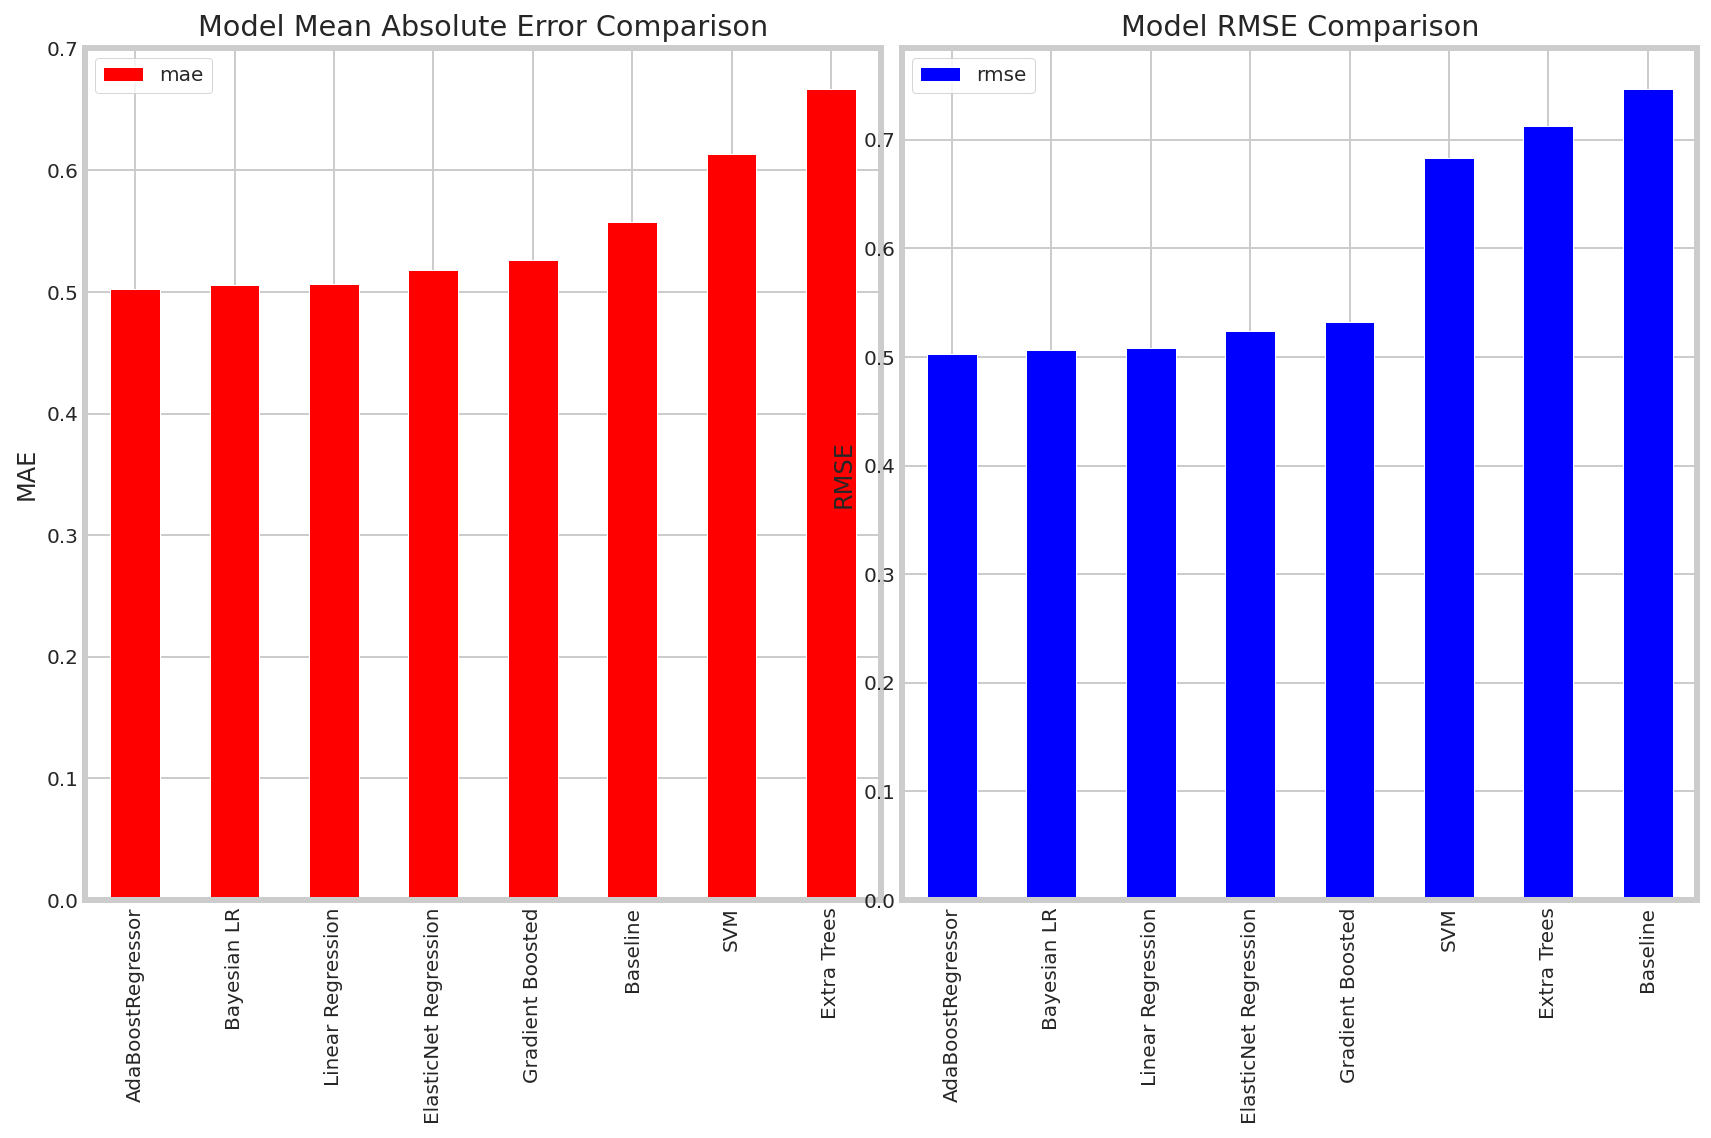

In [50]:
all_model_results = evaluate_trace(trace, xTrain, X_testt, yTrain, y_test, results)

In [51]:
results

,mae,rmse
Linear Regression,0.50656,0.507936
AdaBoostRegressor,0.502235,0.5026
ElasticNet Regression,0.517689,0.524138
Extra Trees,0.666972,0.713152
SVM,0.613278,0.682882
Gradient Boosted,0.526488,0.532724
Baseline,0.557895,0.746924
Bayesian LR,0.505767,0.506946


In [53]:
path3 = "/content/drive/My Drive/Datasets/Fixtures.csv"
data3 = pd.read_csv(path3)
test = data3
#test["Game ID"] = test["Game ID"].astype(int)
test.head()

,Match ID,Date,HomeTeam,AwayTeam
0,1,09/08/2019 20:00,Liverpool,Norwich
1,2,10/08/2019 12:30,West Ham,Man City
2,3,10/08/2019 15:00,Bournemouth,Sheffield Utd
3,4,10/08/2019 15:00,Burnley,Southampton
4,5,10/08/2019 15:00,Crystal Palace,Everton


### Predicting each home game


In [0]:
def createGamePred(team1_vector, team2_vector, xTrain, yTrain):
    xTrain, X_test, yTrain, y_test = train_test_split(xtrainfin, ytrainfin)
    AB = AdaBoostRegressor()
    AB.fit(xTrain, yTrain)
    diff = np.array([a - b for a, b in zip(team1_vector, team2_vector)])
    predictions = AB.predict(diff.reshape(1,-1))
    return predictions

In [0]:
def formulatePredictions():
    probs = [[0 for x in range(2)] for x in range(len(test.index))]
    for index, row in test.iterrows():
        game_ID = row["Match ID"]
        team1_Name = row["HomeTeam"]
        team2_Name = row["AwayTeam"]
        team1_vector = TeamData(team1_Name)
        team2_vector = TeamData(team2_Name)
        prediction = createGamePred(team1_vector, team2_vector, xTrain, yTrain)
        probs[index][0] = game_ID
        probs[index][1] = prediction
    probs = pd.np.array(probs)
    return probs


### Predicting each away games

In [0]:
def createGamePred(team1_vector, team2_vector, xTrain, yTrain):
     xTrain, X_test, yTrain, y_test = train_test_split(xtrainfin, ytrainfin)
     AB = AdaBoostRegressor()
     AB.fit(xTrain, yTrain)
     diff = np.array([a - b for a, b in zip(team1_vector, team2_vector)])
     predictions = AB.predict(diff.reshape(1,-1))
     return predictions

In [0]:
predictdf=pd.DataFrame(formulatePredictions(), columns=[["Match ID","Prediction"]])
pf1 = predictdf.drop(['Match ID'], axis = 1)
predictable = pd.concat([test, pf1], axis=1)
predictable.columns
ptdf = predictable.drop(predictable.index[-1])


#### Taking out matches of Cardiff, Fulham and Huddersfield because of relegation

In [0]:
ptdf2 = ptdf[ptdf.HomeTeam.str.contains("Cardiff") == False]
ptdf3 = ptdf2[ptdf2.AwayTeam.str.contains("Fulham") == False]
ptdf4 = ptdf3[ptdf3.HomeTeam.str.contains("Huddersfield") == False]
ptdf5 = ptdf4[ptdf4.AwayTeam.str.contains("Huddersfield") == False]
ptdf6 = ptdf5[ptdf5.HomeTeam.str.contains("Cardiff") == False]
ptdf7 = ptdf6[ptdf6.AwayTeam.str.contains("Fulham") == False]


In [0]:
ptdf7.columns.values[4] = "HTwinPredict"
ptdf7.columns
ptdf7["ATwinPredict"] = 1 - ptdf7.iloc[:,4]

In [67]:
ptdf7.head(50)

,Match ID,Date,HomeTeam,AwayTeam,HTwinPredict,ATwinPredict,Winner,Loser
0,1,09/08/2019 20:00,Liverpool,Norwich,[0.34782608695652173],[0.6521739130434783],Norwich,Liverpool
1,2,10/08/2019 12:30,West Ham,Man City,[0.5116279069767442],[0.4883720930232558],West Ham,Man City
2,3,10/08/2019 15:00,Bournemouth,Sheffield Utd,[1.0],[0.0],Bournemouth,Sheffield Utd
3,4,10/08/2019 15:00,Burnley,Southampton,[0.5337552742616034],[0.4662447257383966],Burnley,Southampton
4,5,10/08/2019 15:00,Crystal Palace,Everton,[0.5103926096997691],[0.4896073903002309],Crystal Palace,Everton
5,6,10/08/2019 15:00,Watford,Brighton,[0.49165120593692024],[0.5083487940630798],Brighton,Watford
6,7,10/08/2019 17:30,Spurs,Aston Villa,[0.4790575916230366],[0.5209424083769634],Aston Villa,Spurs
7,8,11/08/2019 14:00,Leicester,Wolves,[0.5146666666666667],[0.4853333333333333],Leicester,Wolves
8,9,11/08/2019 14:00,Newcastle,Arsenal,[0.4947589098532495],[0.5052410901467506],Arsenal,Newcastle
9,10,11/08/2019 16:30,Man Utd,Chelsea,[0.5905511811023622],[0.40944881889763785],Man Utd,Chelsea


In [0]:
#dfAF3 = dfAF2.reset_index(drop=True)


In [0]:
def win(row):
    if (row["HTwinPredict"] > row["ATwinPredict"]):
        return row["HomeTeam"]
    elif (row["ATwinPredict"] > row["HTwinPredict"]):
        return row["AwayTeam"]
    elif (row["ATwinPredict"] == row["HTwinPredict"]):
        return "DRAW"
    

def lose(row):
    if (row["HTwinPredict"] < row["ATwinPredict"]):
        return row["HomeTeam"]
    elif (row["ATwinPredict"] < row["HTwinPredict"]):
        return row["AwayTeam"]
    elif (row["ATwinPredict"] == row["HTwinPredict"]):
        return "DRAW"

ptdf7["Winner"] = ptdf7.apply(win, axis=1) 
ptdf7["Loser"] = ptdf7.apply(lose, axis=1)


In [72]:
ptdf7.head()

,Match ID,Date,HomeTeam,AwayTeam,HTwinPredict,ATwinPredict,Winner,Loser
0,1,09/08/2019 20:00,Liverpool,Norwich,[0.34782608695652173],[0.6521739130434783],Norwich,Liverpool
1,2,10/08/2019 12:30,West Ham,Man City,[0.5116279069767442],[0.4883720930232558],West Ham,Man City
2,3,10/08/2019 15:00,Bournemouth,Sheffield Utd,[1.0],[0.0],Bournemouth,Sheffield Utd
3,4,10/08/2019 15:00,Burnley,Southampton,[0.5337552742616034],[0.4662447257383966],Burnley,Southampton
4,5,10/08/2019 15:00,Crystal Palace,Everton,[0.5103926096997691],[0.4896073903002309],Crystal Palace,Everton


In [74]:
ptdf7.columns

Index(['Match ID', 'Date', 'HomeTeam', 'AwayTeam', 'HTwinPredict',
       'ATwinPredict', 'Winner', 'Loser'],
      dtype='object')

In [75]:
ptdf7["Winner"].value_counts()

Burnley           24
Man Utd           21
Arsenal           20
Everton           20
Sheffield Utd     20
Man City          20
Chelsea           20
West Ham          20
Leicester         20
Crystal Palace    19
Watford           19
Aston Villa       18
Bournemouth       17
Brighton          17
Wolves            17
Newcastle         16
Southampton       16
Liverpool         16
Norwich           16
Spurs             15
DRAW               8
Name: Winner, dtype: int64

In [77]:
ptdf7["Loser"].value_counts()

Southampton       22
Spurs             22
Norwich           21
Liverpool         21
Newcastle         21
Brighton          20
Wolves            20
Bournemouth       20
Leicester         18
Aston Villa       18
Crystal Palace    18
Chelsea           18
Man Utd           17
Arsenal           17
Watford           17
West Ham          17
Man City          17
Sheffield Utd     17
Everton           17
Burnley           13
DRAW               8
Name: Loser, dtype: int64